In [ ]:
import dill
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import plotly.express as px
import plotly.graph_objs as go
print('done')
import csv
import matplotlib
import sys
results_folder_string = "../results_merged2"
# USE_PLOTLY = False
sys.path.append('..')



In [ ]:

def load_from_csv(input_string):
    with open(input_string, 'r') as fp:
        reader = csv.reader(fp)
        li = list(reader)
    newlist = []
    for row in li:
        newrow = []
        for entry in row [1:]:
            if entry!='':
                newrow.append(float(entry))
        newlist.append(newrow)
    return newlist


experiment_config_JSD_before = load_from_csv(results_folder_string+"/experiment_config_JSD_before.csv")
experiment_config_JSD_after = load_from_csv(results_folder_string+"/experiment_config_JSD_after.csv")
experiment_config_flip_TP = load_from_csv(results_folder_string+"/experiment_config_flip_TP.csv")
experiment_config_flip_TN = load_from_csv(results_folder_string+"/experiment_config_flip_TN.csv")
experiment_config_flip_FP = load_from_csv(results_folder_string+"/experiment_config_flip_FP.csv")
experiment_config_flip_FN = load_from_csv(results_folder_string+"/experiment_config_flip_FN.csv")
experiment_config_entropy_before = load_from_csv(results_folder_string+"//experiment_config_entropy_before.csv")
experiment_config_entropy_after = load_from_csv(results_folder_string+"/experiment_config_entropy_after.csv")
experiment_config_wasserstein_JSD_before = load_from_csv(results_folder_string+"//experiment_config_wasserstein_JSD_before.csv")
experiment_config_wasserstein_JSD_after = load_from_csv(results_folder_string+"/experiment_config_wasserstein_JSD_after.csv")
experiment_config_continuous_MSE_before = load_from_csv(results_folder_string+"/experiment_config_continuous_MSE_before.csv")
experiment_config_continuous_MSE_after = load_from_csv(results_folder_string+"/experiment_config_continuous_MSE_after.csv")

with open(results_folder_string+"/experiments","rb") as current_file:
    experiments = dill.load(current_file)

    
non_unique_params = np.array([experiment['parameter'] for experiment in experiments])
non_unique_config_strings = np.array([experiment['config_string'] for experiment in experiments],dtype=object)

par_indices = np.unique(non_unique_params,return_index=True)[1]
string_indices = np.unique(non_unique_config_strings,return_index=True)[1]

parameters = non_unique_params[np.sort(par_indices)]
config_strings = non_unique_config_strings[np.sort(string_indices)]
# config_strings[0],config_strings[1],config_strings[2] = config_strings[2],config_strings[0],config_strings[1]
# config_strings[[0,1,2]] = config_strings[[2,0,1]]
print(config_strings)


def str_noneguard(obj):
    if hasattr(obj,'__name__'):
        return obj.__name__
    if obj is None:
        return ''
    if isinstance(obj,list):
        return str([str_noneguard(x) for x in obj])
    return str(obj)


print(len(config_strings))
# colors=['#4285F4','#EA4335', '#FBBC04',  '#34A853','#000000','#46BDC6',      '#46BDC6',             '#F4CCCC','#C9DAF8',            'grey','purple']
# red yellow !!!! !!!!! green teal ?? !!!!!!
# colors=['#EA4335', '#FBBC04', '#4285F4', '#000000','#34A853','#46BDC6',                  '#F4CCCC','purple',]
#        red         yellow      teal       black     green     blue      ??     purple
# colors=['#EA4335', '#FBBC04', '#46BDC6', '#000000','#34A853','#4285F4', 'None',  'purple']
#         teal        red       black     yellow    purple     green       blue       ??
# colors=['#46BDC6', '#EA4335', '#000000', '#FBBC04','#800080','#34A853', '#4285F4',  '#EEEEEE']

# #         teal        red       black     yellow     green       blue       ??
# colors=['#46BDC6', '#EA4335', '#000000', '#FBBC04','#34A853', '#4285F4',  '#EEEEEE'] # got rid of purple

#          red      yellow     green       blue       teal      black,    purple
red, yellow, green, blue, teal, black, purple= '#EA4335', '#FBBC04','#34A853', '#4285F4', '#46BDC6', '#000000','#800080' 
colors=red, yellow, green, blue, black, purple, teal
print(len(colors))
print(config_strings)
print("")
print("")

print(parameters)
print("")

config_strings=np.array(config_strings)
config_strings[[-6,-5,-4,-3,-2,-1]]= config_strings[[-6, -5, -4, -1, -2, -3]]

# config_strings = np.delete(config_strings,[-2,-1])


# parameters[[3,4,5,6,7,8,9,10,11,12]] = parameters[[-4,-3,-2,5,3,4,6,8,-1,7]]
print(parameters)

CCE_strings = [config_string for config_string in config_strings if "CCE" in config_string]
# CCE_strings = [config_string for config_string in config_strings if "JSD" in config_string]



In [19]:

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from textwrap import wrap
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)                 

def hex_to_rgb(hex_color: str) -> tuple:
    # thanks to https://community.plotly.com/t/scatter-plot-fill-with-color-how-to-set-opacity-of-fill/29591/2
    hex_color = hex_color.lstrip("#")
    if len(hex_color) == 3:
        hex_color = hex_color * 2
    return int(hex_color[0:2], 16), int(hex_color[2:4], 16), int(hex_color[4:6], 16)

def adjust_lightness(color, amount=0.5):
    # All credits for this function go to Ian Hincks and F Lekschas
    # https://stackoverflow.com/a/49601444
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])    

def plot_vals(i,existing_data_string,USE_PLOTLY,excluded_config_strings=[],combined="",ylim=[-175,100]):

    if USE_PLOTLY:
        fig = go.Figure()

    else:
        fig, ax = plt.subplots(figsize=[10,6])  
        

    parameter = parameters[i]
    bar=0
    all_numbers = True
    runs = 0

    for config_index,config_string in enumerate(config_strings):
        if "Wasserstein" in config_string:
            continue
            # pass


        if existing_data_string is not None:
            if not (existing_data_string in config_string):
                continue

            if "NO_ADDED_NOISE" in config_string:
                # if not ("NO_ADDED_NOISE" in existing_data_sring):
                #     continue
                # color=colors[runs]
                continue
            else:
                if "SD=4" in config_string or "SD=100" in config_string:
                    continue
                if "JSD" in config_string:
                    if "SD=4" in config_string:
                        if not "u," in config_string:
                            color=red
                        else:
                            color=yellow
                    elif "SD=100" in config_string:
                        if not "u," in config_string:
                            color=green
                        else:
                            color=blue
                    else:
                        if not "u," in config_string:
                            color=red
                        else:
                            color=yellow
                elif "Wasserstein" in config_string:
                    if "SD=100" in config_string:
                        color=purple
                    elif "SD=4" in config_string:
                        # continue    
                        color=black                    
                    else:
                        color=purple


        else:
            if "NO_ADDED_NOISE" in config_string or "surgical_case_durations" in config_string or "LBP RA" in config_string:
                continue           
            if "JSD" in config_string:
                if "SD=4" in config_string:
                    if not "u," in config_string:
                        color=red
                    else:
                        color=yellow
                elif "SD=100" in config_string:
                    if not "u," in config_string:
                        color=green
                    else:
                        color=blue
                else:
                    if not "u," in config_string:
                        color=red
                    else:
                        color=yellow
            elif "Wasserstein" in config_string:
                if "SD=100" in config_string:
                    color=purple
                elif "SD=4" in config_string:
                    # continue    
                    color=black                    
                else:
                    color=purple 
            # color=colors[config_index-36]
    #     print("--------- " + config_string + " -----------")
        filtered_experiments = [ex for ex in experiments if ex['parameter']==parameter and ex['config_string']==config_string and config_string not in excluded_config_strings]
        if len(filtered_experiments)==0:
            continue
            
        runs +=1
        
        mappings = np.array([x['mapping'] for x in filtered_experiments])
        x_values = [x['current_var'] for x in filtered_experiments]
        for x in x_values:
            if not isinstance(x,int) and not isinstance(x,float):
                all_numbers=False

        if not all_numbers:
            for i in range(len(x_values)):
                x_values[i] = str_noneguard(x_values[i])

        JSD_before = np.array([np.array(result) for result in np.array(experiment_config_JSD_before,dtype=object)[mappings] ])
        JSD_after = np.array([np.array(result) for result in np.array(experiment_config_JSD_after,dtype=object)[mappings] ])
        flip_TP = np.array([np.array(result) for result in np.array(experiment_config_flip_TP,dtype=object)[mappings] ])
        flip_TN = np.array([np.array(result) for result in np.array(experiment_config_flip_TN,dtype=object)[mappings] ])
        flip_FP = np.array([np.array(result) for result in np.array(experiment_config_flip_FP,dtype=object)[mappings] ])
        flip_FN = np.array([np.array(result) for result in np.array(experiment_config_flip_FN,dtype=object)[mappings] ])
        entropy_before = np.array([np.array(result) for result in np.array(experiment_config_entropy_before,dtype=object)[mappings] ])
        entropy_after = np.array([np.array(result) for result in np.array(experiment_config_entropy_after,dtype=object)[mappings] ])
        wasserstein_JSD_before = np.array([np.array(result) for result in np.array(experiment_config_wasserstein_JSD_before,dtype=object)[mappings] ])
        wasserstein_JSD_after = np.array([np.array(result) for result in np.array(experiment_config_wasserstein_JSD_after,dtype=object)[mappings] ])
        continuous_MSE_before = np.array([np.array(result) for result in np.array(experiment_config_continuous_MSE_before,dtype=object)[mappings] ])
        continuous_MSE_after = np.array([np.array(result) for result in np.array(experiment_config_continuous_MSE_after,dtype=object)[mappings] ])

        if np.issubdtype(JSD_before.dtype,np.number):
            JSD_reduction = 100 - ((JSD_after / JSD_before)*100)
            accuracy =100 * ((flip_TP+flip_TN) / (flip_TP+flip_TN+flip_FP+flip_FN))
            f1_score = 100 * ((flip_TP) / (flip_TP + 0.5*(flip_FP + flip_FN)))
            entropy_reduction = 100 - ((entropy_after / entropy_before)*100)
            wasserstein_JSD_reduction = 100 - ((wasserstein_JSD_after / wasserstein_JSD_before)*100)
            continuous_MSE_reduction = 100 - ((continuous_MSE_after / continuous_MSE_before)*100)

            means_JSD_reduction = np.nanmean(JSD_reduction,axis=1)
            sigmas_JSD_reduction = np.nanstd(JSD_reduction,axis=1)
            means_accuracy = np.nanmean(accuracy,axis=1)
            sigmas_accuracy = np.nanstd(accuracy,axis=1)
            means_f1_score = np.nanmean(f1_score,axis=1)
            sigmas_f1_score = np.nanstd(f1_score,axis=1)
            means_entropy_reduction = np.nanmean(entropy_reduction,axis=1)
            sigmas_entropy_reduction = np.nanstd(entropy_reduction,axis=1)
            means_wasserstein_JSD_reduction = np.nanmean(wasserstein_JSD_reduction,axis=1)
            sigmas_wasserstein_JSD_reduction = np.nanstd(wasserstein_JSD_reduction,axis=1)
            means_continuous_MSE_reduction = np.nanmean(continuous_MSE_reduction,axis=1)
            sigmas_continuous_MSE_reduction = np.nanstd(continuous_MSE_reduction,axis=1)


        else:
            JSD_reduction = []
            accuracy = []
            f1_score = []
            entropy_reduction = []
            wasserstein_JSD_reduction = []
            continuous_MSE_reduction = []

            means_JSD_reduction = []
            sigmas_JSD_reduction = []
            means_accuracy = []
            sigmas_accuracy = []
            means_f1_score = []
            sigmas_f1_score = []
            means_entropy_reduction = []
            sigmas_entropy_reduction = []
            means_wasserstein_JSD_reduction = []
            sigmas_wasserstein_JSD_reduction = []
            means_continuous_MSE_reduction = []
            sigmas_continuous_MSE_reduction = []



            for i in range(len(JSD_before)):
                JSD_reduction_current = 100 - ((JSD_after[i] / JSD_before[i])*100)
                accuracy_current =100 * ((flip_TP[i]+flip_TN[i]) / (flip_TP[i]+flip_TN[i]+flip_FP[i]+flip_FN[i]))
                f1_score_current = 100 * ((flip_TP[i]) / (flip_TP[i] + 0.5*(flip_FP[i] + flip_FN[i])))
                entropy_reduction_current = 100 - ((entropy_after[i] / entropy_before[i])*100)
                wasserstein_JSD_reduction_current = 100 - ((wasserstein_JSD_after[i] / wasserstein_JSD_before[i])*100)
                continuous_MSE_reduction_current = 100 - ((continuous_MSE_after[i] / continuous_MSE_before[i])*100)


                JSD_reduction.append(JSD_reduction_current)
                accuracy.append(accuracy_current)
                f1_score.append(f1_score_current)
                entropy_reduction.append(entropy_reduction_current)
                wasserstein_JSD_reduction.append(wasserstein_JSD_reduction_current)
                continuous_MSE_reduction.append(continuous_MSE_reduction_current)

                means_JSD_reduction.append(np.nanmean(JSD_reduction_current))
                sigmas_JSD_reduction.append(np.nanstd(JSD_reduction_current))
                means_accuracy.append(np.nanmean(accuracy_current))
                sigmas_accuracy.append(np.nanstd(accuracy_current))
                means_f1_score.append(np.nanmean(f1_score_current))
                sigmas_f1_score.append(np.nanstd(f1_score_current))
                means_entropy_reduction.append(np.nanmean(entropy_reduction_current))
                sigmas_entropy_reduction.append(np.nanstd(entropy_reduction_current))
                means_wasserstein_JSD_reduction.append(np.nanmean(wasserstein_JSD_reduction_current))
                sigmas_wasserstein_JSD_reduction.append(np.nanstd(wasserstein_JSD_reduction_current))
                means_continuous_MSE_reduction.append(np.nanmean(continuous_MSE_reduction_current))
                sigmas_continuous_MSE_reduction.append(np.nanstd(continuous_MSE_reduction_current))                


                
            JSD_reduction = np.array(JSD_reduction)
            accuracy = np.array(accuracy)
            f1_score = np.array(f1_score)
            entropy_reduction = np.array(entropy_reduction)
            wasserstein_JSD_reduction=np.array(wasserstein_JSD_reduction)
            continuous_MSE_reduction=np.array(continuous_MSE_reduction)


            means_JSD_reduction = np.array(means_JSD_reduction)
            sigmas_JSD_reduction = np.array(sigmas_JSD_reduction)
            means_accuracy = np.array(means_accuracy)
            sigmas_accuracy = np.array(sigmas_accuracy)
            means_f1_score = np.array(means_f1_score)
            sigmas_f1_score = np.array(sigmas_f1_score)
            means_entropy_reduction = np.array(means_entropy_reduction)
            sigmas_entropy_reduction = np.array(sigmas_entropy_reduction)
            means_wasserstein_JSD_reduction = np.array(means_wasserstein_JSD_reduction)
            sigmas_wasserstein_JSD_reduction = np.array(sigmas_wasserstein_JSD_reduction)
            means_continuous_MSE_reduction = np.array(means_continuous_MSE_reduction)
            sigmas_continuous_MSE_reduction = np.array(sigmas_continuous_MSE_reduction)

        # TODO use other values as well

        # means = means_JSD_reduction
        # sigmas = sigmas_JSD_reduction



        different_measures = []
        normal_alpha=0.2
        unchanged_color = adjust_lightness(color,1)
        full_line = "-"

        if combined=="combined" or combined=="1":
            lighter_color = adjust_lightness(color,1.2)
            darker_color=adjust_lightness(color,0.8)
            reduced_alpha=0.1
            dashed="--"
            dots=":"
        else:
            lighter_color = adjust_lightness(color,1)
            darker_color=adjust_lightness(color,1)
            reduced_alpha=0.2
            dashed="-"
            dots="--"

            

        if (combined=="combined" and ("SD=4" in config_string or existing_data_string is not None)) or combined=="1":
            different_measures.append((means_JSD_reduction,sigmas_JSD_reduction,", JSD reduction","o" + full_line ,unchanged_color,normal_alpha))
        
        # TODO something goes wrong here, not always added to synth plots
        # TODO always add to real world plots
        if ("SD=4" in config_string  or existing_data_string is not None) and (combined=="combined" or combined=="2"):
            different_measures.append((means_accuracy,sigmas_accuracy, ", Flip Accuracy","^"  + dashed,darker_color,reduced_alpha))
            different_measures.append((means_f1_score,sigmas_f1_score, ", Flip F1 Score","v" + dots,lighter_color,reduced_alpha))

        # TODO always add to real world plots
        if ((not "SD=4" in config_string)  or existing_data_string is not None) or parameter=="sampling_density":
            if (combined=="1" or combined=="combined"):
                pass
                # different_measures.append((means_wasserstein_JSD_reduction,sigmas_wasserstein_JSD_reduction,", Wasserstein reduction","x" + dashed,darker_color,reduced_alpha))
            if combined=="2" or combined=="combined":
                dots=":"
                different_measures.append((means_continuous_MSE_reduction,sigmas_continuous_MSE_reduction,", MSE reduction","s" + dots,lighter_color,reduced_alpha))



        # config_string=config_string.replace('Wasserstein', 'Wasserstein loss')
        if existing_data_string is None:
            config_string=config_string.replace('SD=4', 'categorical')
            config_string=config_string.replace('SD=100', 'continuous')
            config_string=config_string.replace('Wasserstein', 'Wasserstein loss')
        else:
            config_string=config_string.replace('Wasserstein', 'Wasserstein/JSD loss')
        # config_string=config_string.replace('SD=None', 'heuristic SD')
        config_string=config_string.replace('SD=None, ', '')
        config_string=config_string.replace('CCE', 'Log loss')
        config_string=config_string.replace('JSD', 'JSD loss')

        config_string=config_string.replace('loss,', 'loss (semi-supervised),')
        config_string=config_string.replace('u,', ' (unsupervised),')

        config_string=config_string.replace('loss loss', 'loss')    

        # config_string=config_string.replace('surgical_case_durations, ', '')    
        # config_string=config_string.replace('LBP RA, ', '')    


        if parameter=="training_method":
            config_string=config_string.replace(' (semi-supervised),', ',')
        if parameter=="sampling_density":
            config_string=config_string.replace(', categorical', '')
            config_string=config_string.replace(', continuous', '')

        

        parameter_string = parameter.replace('_',' ').capitalize()

        #x_values

        #['training_method' 'labeled_data_percentage' 'sampling_density'
 #'activation_types' 'input_layer_type' 'encoding_dim' 'hidden_layers'
# 'activity_regularizer' 'sigma' 'BN_size' 'gaussian_noise_sigma'
 #'missing_entry' 'missing_entry_combined' 'missing_entry_no_denoising']
        if USE_PLOTLY:
            ax = fig

        if parameter=='training_method':
            x_values=['Supervised','Supervised (2% labeled)', 'Semi-supervised (unlabeled data first)','Semi-supervised (labeled data first)', 'Semi-supervised (mix of labeled and unlabeled)', 'Unsupervised']
        elif parameter=='activation_types':
            parameter_string="Activation functions"
            x_values=['Sin, cos, linear, ReLU, Swish', 'ReLU (1x)', 'ReLU (5x)', 'Sin, cos, linear', 'Sin, cos, linear, ReLU, sigmoid']
        elif parameter=='input_layer_type':
            x_values=['Dense layer (ReLU)','Gaussian noise','Gaussian dropout','Square root followed by softmax','RBF kernel','1D Convolution', 'VAE (Sampling at encoder output)']
            parameter_string += '$ _{}$'
        elif parameter=='activity_regularizer':
            x_values=['No regularization','L2 (λ=0.01)','L2 (λ = $10^{-4}$)','L1 (λ=0.01)','L1 (λ = $10^{-4}$)']
            # parameter_string += '\n \n 
        elif parameter=='sigma':
            parameter_string='$\sigma_{PDB}$/$(100/K_j)$'
        elif parameter=='labeled_data_percentage':
            if not USE_PLOTLY:
                ax.set_xscale('log')
                ax.set_xlim([10**-2,10**2])
            else:
                fig.update_xaxes(type="log",range=[-2,2])
            parameter_string='Labeled data amount (%)'
        elif parameter=='sampling_density':
            parameter_string='Sampling density ($K_j$)'
        elif parameter=='encoding_dim':
            parameter_string="Latent space dimensions"
        elif parameter=='BN_size':
            parameter_string='BN size ($N$)'
        elif parameter=='gaussian_noise_sigma':
            parameter_string='$\sigma_{Gaussian\ noise\ layer}$'
            for i in range(len(x_values)):
                x_values[i] = x_values[i].replace('lambda SD: ','')
                x_values[i]=x_values[i].replace('(','')
                x_values[i]=x_values[i].replace('/SD)*100',' ·\n(100/$K_j$)')
            # parameter_string += ('\n \n ')
        elif parameter=='missing_entry':
            x_values=np.array(x_values)*100
            if not USE_PLOTLY:
                ax.set_xscale('log')
            else:
                fig.update_xaxes(type="log")
            parameter_string='Fraction of entries that are missing (%)'
        elif parameter=='missing_entry_combined':
            x_values=np.array(x_values)*100
            if not USE_PLOTLY:
                ax.set_xscale('log')
            else:
                fig.update_xaxes(type="log")
            parameter_string='Fraction of entries that are missing (%)'       
        elif parameter=='missing_entry_no_denoising':
            x_values=np.array(x_values)*100
            if not USE_PLOTLY:
                ax.set_xscale('log')
            else:
                fig.update_xaxes(type="log")
            parameter_string='Fraction of entries that are missing (%)'
        elif parameter=='rows':
            if not USE_PLOTLY:
                ax.set_xscale('log')
            else:
                fig.update_xaxes(type="log")
            parameter_string='Amount of records in database'  
 

        if not USE_PLOTLY:
            plt.xlabel(parameter_string)

        if not all_numbers:
            x_values  = [ '\n'.join(wrap(l, 12)) for l in x_values ]
    #     print("mappings")
    #     display(mappings)
    #     print("")
    #     print("results")
    #     display(results)
    #     print("")
    #     print("x_values")
    #     display(x_values)
    #     print("")
    #     print("means")
    #     display(means)
    #     print("")
    #     print("sigmas")
    #     display(sigmas)
    #     print("\n\n\n")
    #     ax.plot(x_values,means)
#         print(x_values)


        if existing_data_string is not None:
            config_string = config_string.replace(existing_data_string,'')
            config_string = config_string[:-2]

        if USE_PLOTLY:
            for means,sigmas,labelstring,line_type,color,alpha in different_measures:
                newcolor='rgb' + str(color)
                if all_numbers:
                    symbol='circle'
                    
                    line={'color':newcolor}
                    if "o" or '.' in line_type:
                        symbol='circle'
                    elif '*' in line_type:
                        symbol='star'
                    elif 'x' in line_type:
                        symbol='x-thin'
                    
                    if '--' in line_type:
                        line['dash']='dash'
                    elif ':' in line_type:
                        line['dash']='dot'
                    

                    # fig.add_trace(go.Scatter(x=x_values, y=means, error_y={"array":sigmas}, marker_color=color,name=config_string,mode='lines+markers'))
                    fig.add_trace(go.Scatter(x=x_values, y=means, marker_color=newcolor,name=config_string+labelstring,mode='lines+markers',marker_symbol=symbol,line=line))
                    fig.add_trace(go.Scatter(x=x_values, y=means+sigmas, marker_color=newcolor,name="Upper bound", line=dict(width=0), showlegend=False, mode='lines'))
                    fig.add_trace(go.Scatter(x=x_values, y=means-sigmas, marker_color=newcolor,fillcolor=f"rgba{(*color, alpha)}",name="Lower bound", line=dict(width=0), showlegend=False, fill='tonexty', mode='lines'))  
                else:
                    fig.add_bar(x=x_values,y=means,error_y={"array":sigmas},marker_color=newcolor,name=config_string+labelstring)
        else:
            for means,sigmas,labelstring,line_type,color,alpha in different_measures:
                if (not "SD=4" in config_string) and (not "SD=100" in config_string) and (existing_data_string is not None):
                    # labelstring = ", heuristic SD" + labelstring
                    pass
                if all_numbers:
                    ax.plot(x_values,means,line_type,label=config_string+labelstring,color=color)
                    ax.fill_between(x_values, (means-sigmas), (means+sigmas),alpha=alpha,color=color)
                else:
                    n=len(x_values)
                    ind = np.arange(n)
                    width = 0.1
                    position = ind + (width*(1-n)/2) + bar*width
                    ax.bar(position,means,width=width,yerr=sigmas,label=config_string+labelstring,color=color)
                    bar+=1
    
    if USE_PLOTLY:
        fig.update_yaxes(tick0=0, dtick=25)
        # fig.update_xaxes(tickangle = 0)
        fig.update_layout(yaxis_range=ylim,title=parameter, width=1000, height=600)
        fig.show()
    else:
        ax.set_ylim(ylim)
        if not all_numbers:
            print(x_values)
            print(ind)
    #         ax.axhline(0,"black")
            ax.yaxis.set_major_locator(MultipleLocator(25))
            ax.yaxis.set_minor_locator(MultipleLocator(5))    
            ax.grid(axis="y")
            ax.grid(axis="y",which="minor", linestyle='-', linewidth=1,alpha=0.3)
            
            plt.xticks(ind, x_values)
        else:
            ax.yaxis.set_major_locator(MultipleLocator(25))
            ax.yaxis.set_minor_locator(MultipleLocator(5))
            ax.grid(which="major")
            ax.grid(which="minor", linestyle='-', linewidth=1,alpha=0.3)

        ax.axhline(0,color='black')
        # ax.set_title(parameter)

        # plt.gca().set_axis_off()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                    hspace = 0, wspace = 0)
        plt.margins(0,0)
        # plt.gca().xaxis.set_major_locator(plt.NullLocator())
        # plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.ylabel("Quality improvement (%)")

        
        # ax.legend(bbox_to_anchor=(1.05, 1))
        ax.legend()
        



In [ ]:
font = {
        # 'family' : 'serif',
        # 'serif':'test',
        # 'serif': 'cmr10',
        # 'serif': 'Latin Modern Roman',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('text',usetex=False)

for combined in ["1","2"]:
    for i in range(len(parameters)):
    # for i in [0,1,2,3]:
        param = parameters[i]

        if param == "labeled_data_percentage" or param=="training_method" or param=="sampling_density":
            excluded_config_strings=[]
        else:
            excluded_config_strings=CCE_strings
        plot_vals(i,None,USE_PLOTLY=False,excluded_config_strings=excluded_config_strings,combined=combined)
        plt.savefig("results_fig_"+ parameters[i] + "_plot_" + combined   + ".svg", bbox_inches = 'tight',pad_inches = 0)




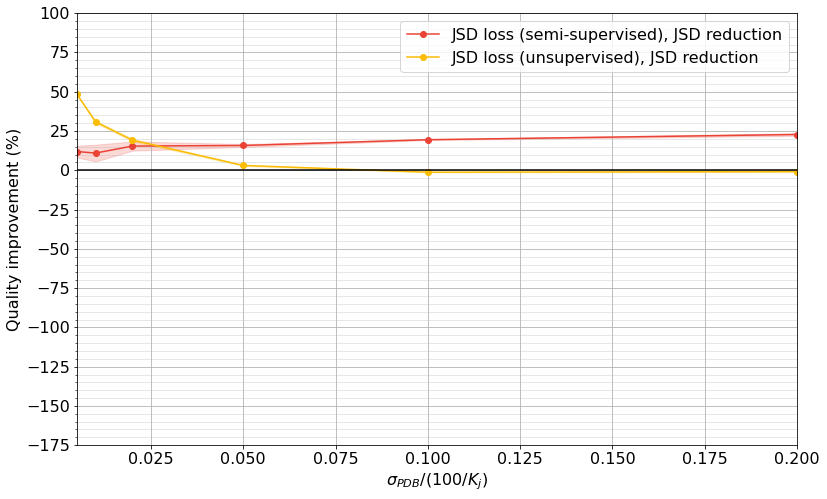

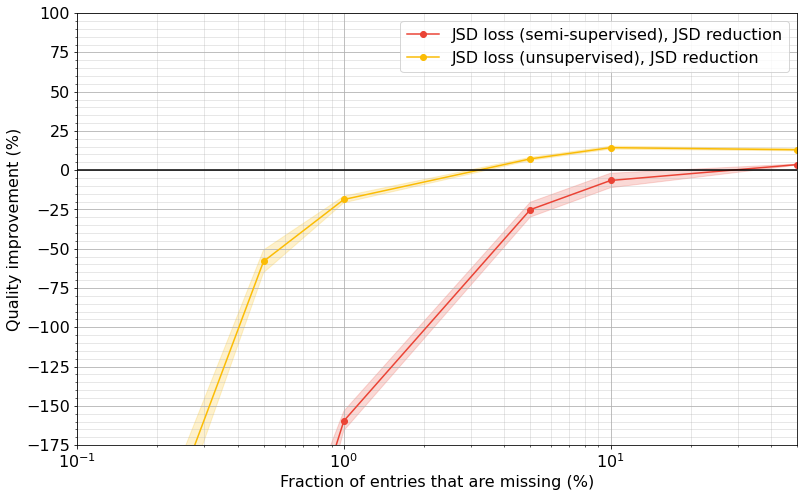

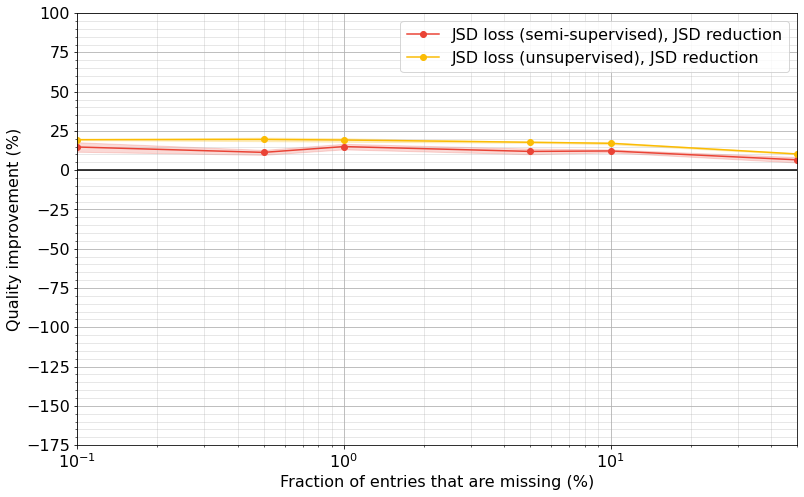

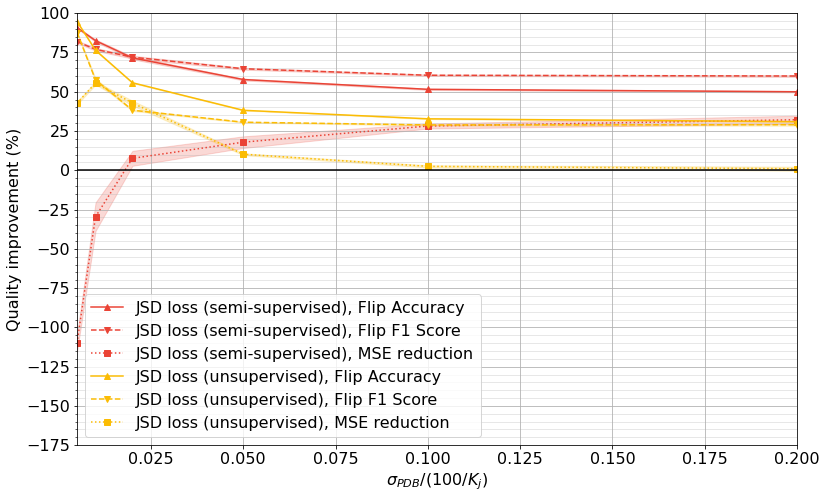

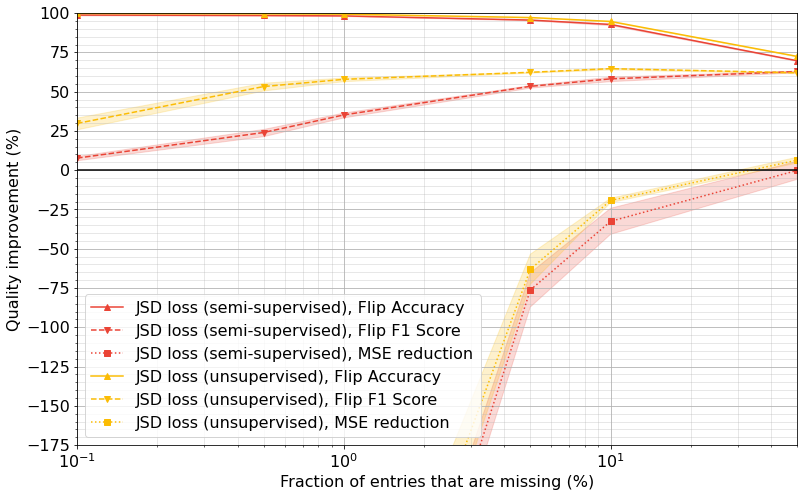

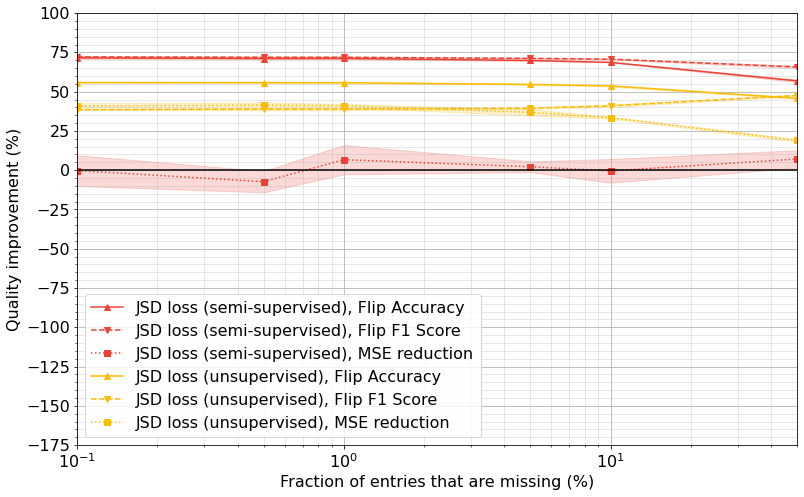

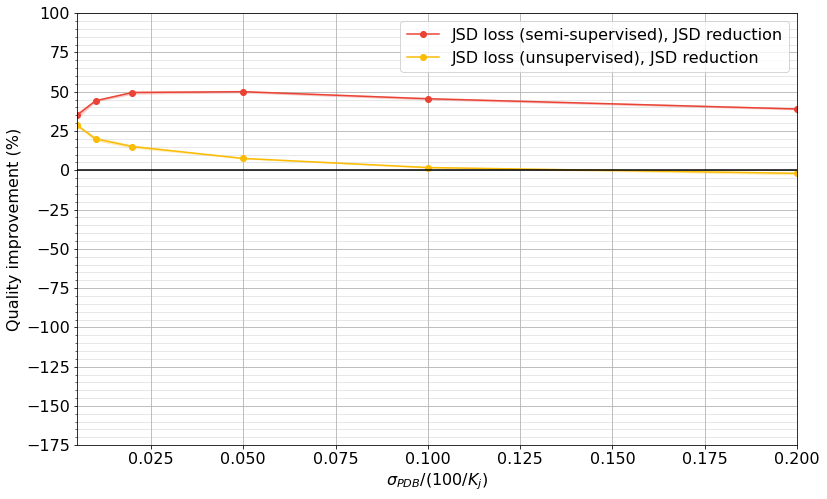

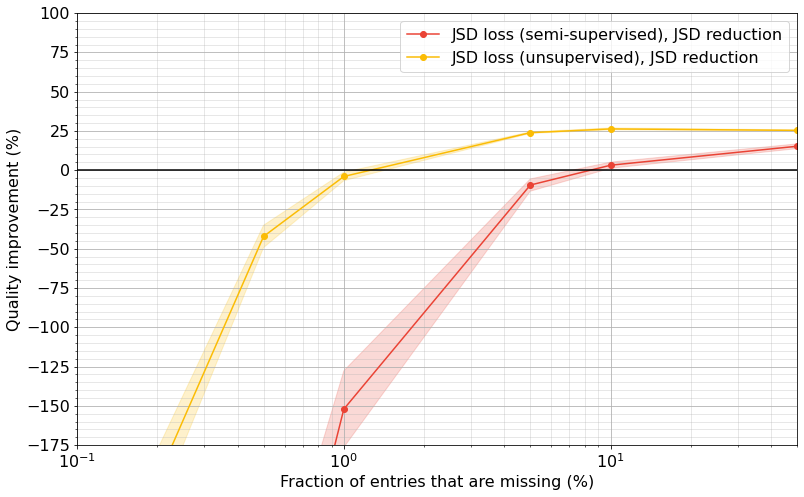

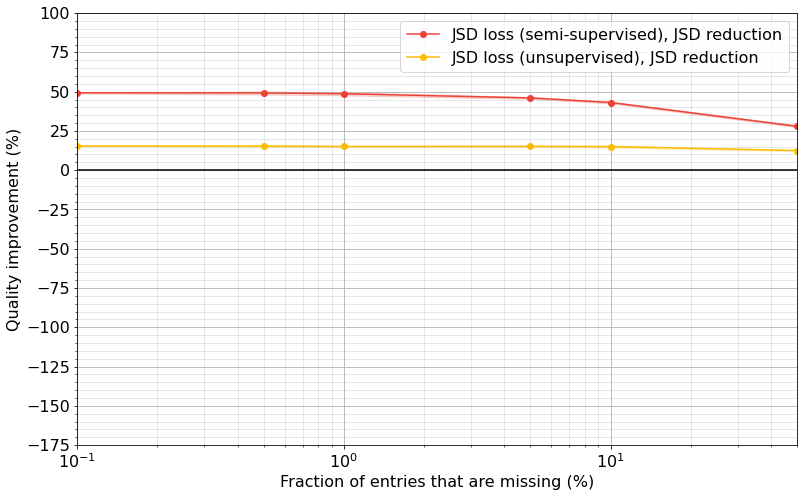

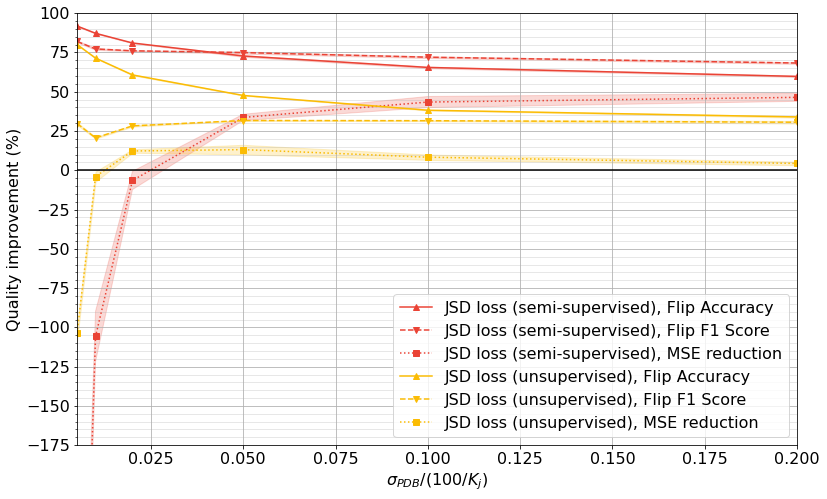

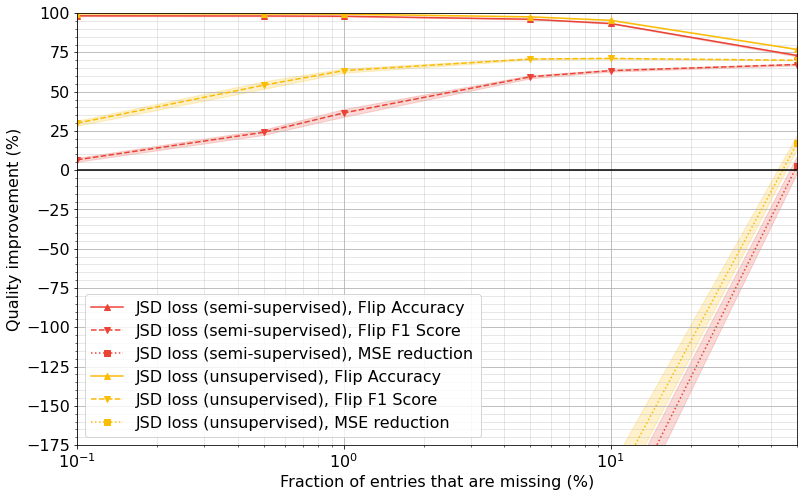

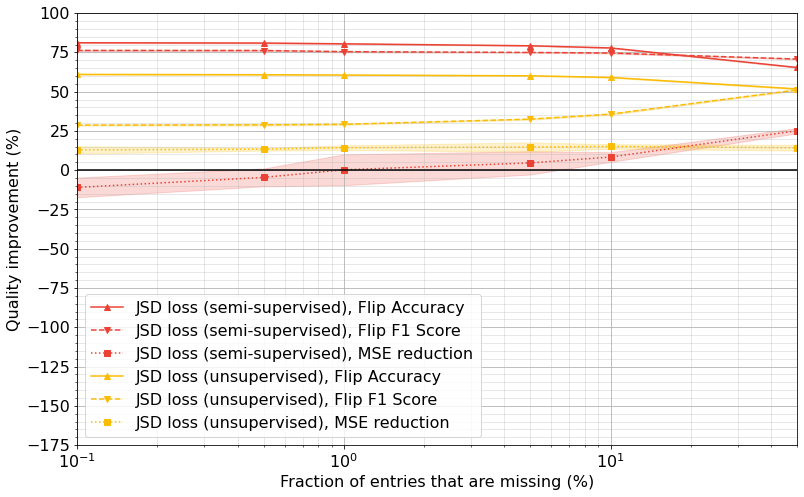

In [20]:

import pandas as pd
param_series = pd.Series(parameters)
param_indices_bools = (param_series == 'sigma') | (param_series=='missing_entry') | (param_series=='missing_entry_combined')
param_indices = param_indices_bools[param_indices_bools].index

unsup_strings = [config_string for config_string in config_strings if ("u," in config_string) or ()]
semi_was_strings = [config_string for config_string in config_strings if ("Wasserstein" in config_string) or (not "u," in config_string)]

# TODO this is bad, reverse properly
unsup_or_JSD_strings = [config_string for config_string in config_strings if (("JSD" in config_string) or ("u," in config_string))]
unsup_or_wass_strings = [config_string for config_string in config_strings if (("Wasserstein" in config_string) or ("u," in config_string))]

excluded_config_list = [semi_was_strings,unsup_or_JSD_strings,unsup_or_wass_strings]
excluded_config_names = ["unsup","semi_wass","semi_jsd"]


for file_string in ["LBP RA","surgical_case_durations"]:
    # for excluded_config_index in range(len(excluded_config_list)):
    for combined in ["1","2"]:
        for i in param_indices:
            # excluded_configs = excluded_config_list[excluded_config_index]
            # excluded_configs_name = excluded_config_names[excluded_config_index]
            excluded_configs=[]
            excluded_configs_name=""
            plot_vals(i,file_string,USE_PLOTLY=False,excluded_config_strings=excluded_configs,combined=combined)
            plt.savefig("results_REALWORLD_"+ parameters[i] +"_" + file_string + "_"  + excluded_configs_name + "_" + combined +   ".svg", bbox_inches = 'tight',pad_inches = 0)



In [ ]:
for i in range(len(parameters)):
    param = parameters[i]

    if param == "labeled_data_percentage" or param=="training_method" or param=="sampling_density":
        excluded_config_strings=[]
    else:
        excluded_config_strings=CCE_strings
    plot_vals(i,None,USE_PLOTLY=True,excluded_config_strings=excluded_config_strings,combined="combined")



In [ ]:

for file_string in ["LBP RA","surgical_case_durations"]:
    for excluded_config_index in range(len(excluded_config_list)):
        for i in param_indices:
            excluded_configs = excluded_config_list[excluded_config_index]
            excluded_configs_name = excluded_config_names[excluded_config_index]
            plot_vals(i,file_string,USE_PLOTLY=True,excluded_config_strings=excluded_configs,combined="combined")
            # plt.savefig("results_REALWORLD_"+ parameters[i] +"_" + file_string + "_"  + excluded_configs_name +  ".svg", bbox_inches = 'tight',pad_inches = 0)



In [ ]:
# a=[len(experiment_config_results[x['mapping']]) for i,x in enumerate(experiments)]
# unique, counts = np.unique(a, return_counts=True)
# dict(zip(unique, counts))


# [str(i) + ": " + x['full_string'] + " --- " +  str(len(experiment_config_results[x['mapping']])) for i,x in enumerate(experiments)]

[str(i) + ": " +  str(len(experiment_config_JSD_after[x['mapping']])) for i,x in enumerate(experiments)]



In [ ]:
# (parameters == 'sigma' | parameters=='missing_entry' | parameters=='missing_entry_no_denoising' | parameters=='missing_entry_combined')

config_strings



In [ ]:
config_strings

